(-3, 2)

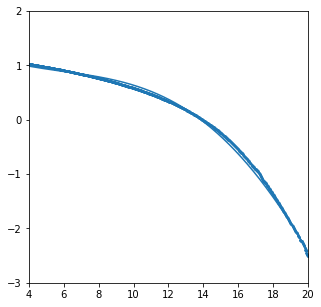

In [2]:
# 计算在WMAP5宇宙中Ludlow模型给出的c-M关系
from scipy import integrate
#import sympy
#import time
import numpy as np
import matplotlib.pyplot as plt

z = 0.5
def E(z):
    E0 = (Omega_m*(1+z)**3+Omega_L)**(1/2)
    return E0

Omega_m = 0.307
Omega_L = 0.693
Omega_b = 0.04825
# Omega_mz = Omega_m*(1+z)**3/E(z)**2
# Omega_Lz = Omega_L/E(z)**2
# Omega_bz = Omega_b*(1+z)**3/E(z)**2

h = 0.6777
R_8 = 8  #h^-1 Mpc
sigma_8 = 0.8288

rho_m = 2.776*10**11*Omega_m # h^2 M_sun Mpc^-3
#rho_m = 2.776*10**11 # h^2 M_sun Mpc^-3
def T(k):
    Gamma = Omega_m*h*np.exp(-Omega_b*(1+np.sqrt(2*h)/Omega_m))
    q = k/Gamma # h Mpc^-1
    T0 = np.log(1+2.34*q)/(2.34*q)*(1+3.89*q+(16.1*q)**2+(5.46*q)**3\
                                    +(6.71*q)**4)**(-0.25)
    return T0

def P(k):
    P1 = k*T(k)**2
    #print(P1)
    return P1

def W(x):
    #start_time = time.time()
    W0 =  3*(np.sin(x)-x*np.cos(x))/x**3
    #print(W0)
    #W0 = np.exp(-x**2/2)
    #end_time = time.time()
    #print(end_time-start_time)
    return W0

def Sigma(M):
    #start_time = time.time()
    rho_m = 2.776*10**11*Omega_m # h^2 M_sun Mpc^-3  ###### 
    r = ((M/rho_m)/(4/3*np.pi))**(1/3)  #h^-1 Mpc
    #print(r)
    #sigma2_8 = integrate.quad(lambda k : 1/(2*np.pi**2)*k**2*P(k)*W(k*R_8)**2, 0, 200)[0]
    sigma2_8 = integrate.quad(lambda k : 1/(2*np.pi**2)*k**2*P(k)*W(k*R_8)**2, 0, 200)[0]
    c1 = sigma_8**2/sigma2_8
    #print(c1)
    #sigma2 = c1*integrate.quad(lambda k : 1/(2*np.pi**2)*k**2*P(k)*W(k*r)**2, 0, np.inf)[0]
    #print(r)
    if r<100:
        sigma2 = c1*integrate.quad(lambda k : (1/(2*np.pi**2)*k**2*P(k)*W(k*r)**2), 0.0, np.inf)[0]
    else:
        sigma2 = c1*integrate.quad(lambda k : (1/(2*np.pi**2)*k**2*P(k)*W(k*r)**2), 0.0, 0.2)[0] 
    #end_time = time.time()
    #print(end_time-start_time)
    return sigma2**0.5

# 建立logSigma和logM的拟合关系，可由logM直接计算logSigma
rho_m = 2.776*10**11*Omega_m # h^2 M_sun Mpc^-3
M_LCDM1 = np.linspace(5, 14, 1000)  # h^-1 M_sun

Sigma_LCDM1 = []
for m in M_LCDM1:
    Sigma_LCDM1.append(Sigma(10**m))

a = np.polyfit(M_LCDM1, np.log10(Sigma_LCDM1), 5)#用2次多项式拟合x，y数组
logsigma_logm = np.poly1d(a)#拟合完之后用这个函数来生成多项式对象
logsigma_plot = logsigma_logm(M_LCDM1)
%matplotlib inline
fig = plt.figure(figsize = (5,5))
plt.scatter(M_LCDM1, np.log10(Sigma_LCDM1), s = 3)
plt.plot(M_LCDM1, logsigma_plot)
plt.xlim(4,20)
plt.ylim(-3,2)


(-10, 2)

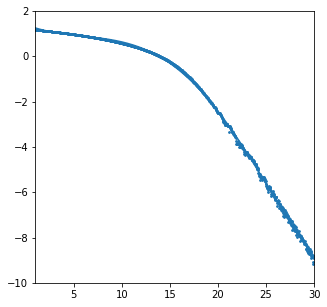

In [5]:
fig = plt.figure(figsize = (5,5))
plt.scatter(M_LCDM1, np.log10(Sigma_LCDM1), s = 3)
plt.plot(M_LCDM1, logsigma_plot)
plt.xlim(1,30)
plt.ylim(-10,2)


In [ ]:
def g(z):
    Omega_mz = Omega_m*(1+z)**3/E(z)**2
    Omega_Lz = Omega_L/E(z)**2
    g0 = 2.5*Omega_mz*(Omega_mz**(4/7)-Omega_Lz+(1+Omega_mz/2)*(1+Omega_Lz/70))**(-1)
    return g0
       
def D(z):
    d = g(z)/(g(0)*(1+z))
    return d

def Delta_c(z):
    delta_z = 1.686/D(z)
    return delta_z

Logm = np.linspace(6,16,100000)
Mu = []
for logm in Logm:
    
    mu = Delta_c(z)/10**logsigma_logm(logm)
    Mu.append(mu)
Mu = np.array(Mu)    
Mu_1,Mu_2,Mu_3 = Mu-1, Mu-2, Mu-3
cha_halo_m=10**Logm[[list(abs(Mu-1)).index(min(abs(Mu_1)))]]
print(cha_halo_m)
mu_1_logmass,mu_2_logmass,mu_3_logmass = Logm[list(abs(Mu-1)).index(min(abs(Mu_1)))],\
                 Logm[list(abs(Mu-1)).index(min(abs(Mu_1)))],\
                 Logm[list(abs(Mu-1)).index(min(abs(Mu_1)))]
